<a href="https://colab.research.google.com/github/SSrishti-14/AI_Lab/blob/main/2205335_AILab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Treasure found at (4, 4)!


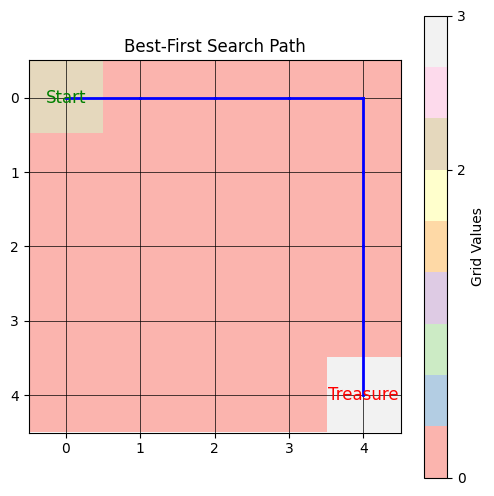

In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Define the grid and treasure location
grid_size = (5, 5)  # Example grid size
treasure = (4, 4)  # Example treasure location
start = (0, 0)  # Starting position

def manhattan_distance(x, y, target_x, target_y):
    """Calculate the Manhattan distance."""
    return abs(x - target_x) + abs(y - target_y)

def best_first_search_with_path(grid_size, start, treasure):
    rows, cols = grid_size
    start_x, start_y = start
    treasure_x, treasure_y = treasure

    # Priority queue (min-heap) for BFS
    open_set = []
    heapq.heappush(open_set, (0, start))  # (heuristic, position)

    # Visited set to avoid revisiting
    visited = set()
    search_path = []  # To record the actual search path
    parent = {}  # To trace the path back

    while open_set:
        # Pop the most promising cell
        current_heuristic, (current_x, current_y) = heapq.heappop(open_set)

        # If treasure found
        if (current_x, current_y) == treasure:
            print(f"Treasure found at {current_x, current_y}!")

            # Reconstruct the path
            path = []
            node = (current_x, current_y)
            while node in parent:
                path.append(node)
                node = parent[node]
            path.append(start)
            return path[::-1]  # Return the path from start to treasure

        # Mark current cell as visited
        visited.add((current_x, current_y))

        # Explore neighbors
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
            neighbor_x, neighbor_y = current_x + dx, current_y + dy

            # Check bounds and if already visited
            if 0 <= neighbor_x < rows and 0 <= neighbor_y < cols and (neighbor_x, neighbor_y) not in visited:
                heuristic = manhattan_distance(neighbor_x, neighbor_y, treasure_x, treasure_y)
                heapq.heappush(open_set, (heuristic, (neighbor_x, neighbor_y)))
                parent[(neighbor_x, neighbor_y)] = (current_x, current_y)  # Record the parent

    print("Treasure not found!")
    return []

def visualize_bfs_path(grid_size, start, treasure, path):
    rows, cols = grid_size
    grid = np.zeros((rows, cols))

    # Mark the start and treasure
    grid[start] = 2  # Start position
    grid[treasure] = 3  # Treasure position

    # Plot the grid
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="Pastel1", origin="upper")
    plt.colorbar(ticks=[0, 2, 3], label="Grid Values")
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(color='black', linestyle='-', linewidth=0.5)

    # Plot the BFS path
    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i + 1]
        plt.plot([y1, y2], [x1, x2], color="blue", linewidth=2)

    # Mark start and treasure
    plt.text(start[1], start[0], "Start", ha="center", va="center", color="green", fontsize=12)
    plt.text(treasure[1], treasure[0], "Treasure", ha="center", va="center", color="red", fontsize=12)

    plt.title("Best-First Search Path")
    plt.show()

# Run the algorithm
bfs_path = best_first_search_with_path(grid_size, start, treasure)

# Visualize the BFS path
if bfs_path:
    visualize_bfs_path(grid_size, start, treasure, bfs_path)
else:
    print("No path found!")


In [ ]:
import numpy as np
from queue import PriorityQueue
import time

In [ ]:
def create_node(position, heuristic, parent=None):
    return {
        'position': position,
        'heuristic': heuristic,
        'parent': parent
    }
def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])
def initialize_grid(size):
    grid = np.zeros((size, size))
    treasure_pos = (np.random.randint(0, size), np.random.randint(0, size))
    start_pos = (0, 0)

    # Set heuristic values
    for i in range(size):
        for j in range(size):
            grid[i][j] = manhattan_distance((i,j), treasure_pos)

    return grid, treasure_pos, start_pos
def get_neighbors(position, size):
    neighbors = []
    moves = [(0,1), (1,0), (0,-1), (-1,0)]  # Right, Down, Left, Up

    for move in moves:
        new_pos = (position[0] + move[0], position[1] + move[1])
        if 0 <= new_pos[0] < size and 0 <= new_pos[1] < size:
            neighbors.append(new_pos)
    return neighbors
def reconstruct_path(node):
    path = []
    current = node
    while current is not None:
        path.append(current['position'])
        current = current['parent']
    return path[::-1]
def best_first_search(grid, start_pos, treasure_pos):
    size = len(grid)
    start_time = time.time()
    nodes_explored = 0

    frontier = PriorityQueue()
    start_node = create_node(start_pos, grid[start_pos])
    # Store only heuristic value as first element of tuple for comparison
    frontier.put((start_node['heuristic'], id(start_node), start_node))

    visited = set()

    while not frontier.empty():
        current_node = frontier.get()[2]  # Get the node from the third element
        current_pos = current_node['position']
        nodes_explored += 1

        if current_pos == treasure_pos:
            end_time = time.time()
            path = reconstruct_path(current_node)
            return {
                'success': True,
                'path': path,
                'nodes_explored': nodes_explored,
                'time_taken': end_time - start_time
            }

        visited.add(current_pos)

        for neighbor_pos in get_neighbors(current_pos, size):
            if neighbor_pos not in visited:
                neighbor = create_node(neighbor_pos, grid[neighbor_pos], current_node)
                # Add unique id to break ties and prevent dict comparison
                frontier.put((neighbor['heuristic'], id(neighbor), neighbor))

    return {'success': False}
def visualize_solution(grid, path, start_pos, treasure_pos):
    size = len(grid)
    print("\nGrid with heuristic values:")
    print(grid)

    print("\nPath taken (T=Treasure, S=Start, *=Path):")
    display_grid = np.full((size, size), '.')
    for pos in path:
        display_grid[pos] = '*'
    display_grid[start_pos] = 'S'
    display_grid[treasure_pos] = 'T'

    for row in display_grid:
        print(' '.join(row))
size = 10
grid, treasure_pos, start_pos = initialize_grid(size)
result = best_first_search(grid, start_pos, treasure_pos)

if result['success']:
    print(f"\nTreasure found!")
    print(f"Nodes explored: {result['nodes_explored']}")
    print(f"Time taken: {result['time_taken']:.4f} seconds")
    print(f"Path length: {len(result['path'])}")
    visualize_solution(grid, result['path'], start_pos, treasure_pos)
else:
    print("No solution found!")


Treasure found!
Nodes explored: 10
Time taken: 0.0003 seconds
Path length: 10

Grid with heuristic values:
[[ 9.  8.  7.  6.  5.  4.  3.  4.  5.  6.]
 [ 8.  7.  6.  5.  4.  3.  2.  3.  4.  5.]
 [ 7.  6.  5.  4.  3.  2.  1.  2.  3.  4.]
 [ 6.  5.  4.  3.  2.  1.  0.  1.  2.  3.]
 [ 7.  6.  5.  4.  3.  2.  1.  2.  3.  4.]
 [ 8.  7.  6.  5.  4.  3.  2.  3.  4.  5.]
 [ 9.  8.  7.  6.  5.  4.  3.  4.  5.  6.]
 [10.  9.  8.  7.  6.  5.  4.  5.  6.  7.]
 [11. 10.  9.  8.  7.  6.  5.  6.  7.  8.]
 [12. 11. 10.  9.  8.  7.  6.  7.  8.  9.]]

Path taken (T=Treasure, S=Start, *=Path):
S * . . . . . . . .
. * * * * * * . . .
. . . . . . * . . .
. . . . . . T . . .
. . . . . . . . . .
. . . . . . . . . .
. . . . . . . . . .
. . . . . . . . . .
. . . . . . . . . .
. . . . . . . . . .
